In [1]:
from SimPEG import * 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# DC Resistivity Simulations

DC resistivity is a zero-frequency electromagnetic problem. A DC resistivity geophysical survey is sensitive to variations in electrical conductivity. 

The governing equation is: 

$$
\nabla \cdot \sigma \nabla \phi = s
$$

where $\sigma$ is the electrical conductivity (S/m), $\phi$ is the electrical potential (V), and $s$ is the source.  

In [2]:
mesh = Mesh.TensorMesh([30,30])
sigma = np.ones(mesh.nC)

In [5]:
def getOperators(mesh,sigma):
    Div = mesh.faceDiv
    Sigma = Utils.sdiag(1/(mesh.aveF2CC.T * (1/sigma)))
    Grad = mesh.cellGrad
    return Div, Sigma, Grad

In [6]:
(Div, Sigma, Grad) = getOperators(mesh,sigma)

In [7]:
# Construct A Matrix
A = Div * Sigma * Grad
Ainv = Solver(A)

In [8]:
# create source
s = np.zeros(mesh.nC)
s[15] = 1.
s[30] = -1

In [9]:
phi = Ainv * s

(<matplotlib.collections.QuadMesh at 0x10720b7d0>,)

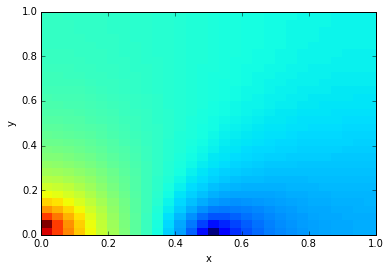

In [10]:
mesh.plotImage(phi)